# Quantify aleatoric uncertainties using some runs

Also, do some plots needed for the paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from utility_functions import *

In [2]:
input_names = [r'$vf$', r'$E_f$ (GPa)', r'$b_{m}$ (MPa)', r'$c_{m}$', 'clustering']
output_names = [r'$b_{eff}$ (MPa)', r'$c_{eff}$', r'$E_{eff}$ (GPa)', r'$\nu_{eff}$', '$p_{\sigma}$']
n_inputs = 4
n_outputs = 5
a_fixed = 400.
name_ext = '_bis_a[400].pkl'

In [3]:
# Get the data to quantify aleatoric uncertainties from pkl files
n = 20
with open('data_aleatoric_n[{}]'.format(n) + name_ext, 'rb') as f:
    d_20 = pickle.load(f)
    print(len(d_20['groups_inputs']))
    print([a.shape for a in d_20['groups_inputs']])
    
    print(len(d_20['groups_outputs']))
    print([a.shape for a in d_20['groups_outputs']])
    
n = 10
with open('data_aleatoric_n[{}]'.format(n) + name_ext, 'rb') as f:
    d_10 = pickle.load(f)
    print(len(d_10['groups_inputs']))
    print([a.shape for a in d_10['groups_inputs']])
    
    print(len(d_10['groups_outputs']))
    print([a.shape for a in d_10['groups_outputs']])

20
[(15, 4), (15, 4), (15, 4), (15, 4), (15, 4), (14, 4), (14, 4), (15, 4), (15, 4), (12, 4), (15, 4), (15, 4), (15, 4), (15, 4), (15, 4), (15, 4), (14, 4), (15, 4), (15, 4), (14, 4)]
20
[(15, 5), (15, 5), (15, 5), (15, 5), (15, 5), (14, 5), (14, 5), (15, 5), (15, 5), (12, 5), (15, 5), (15, 5), (15, 5), (15, 5), (15, 5), (15, 5), (14, 5), (15, 5), (15, 5), (14, 5)]
10
[(10, 4), (5, 4), (10, 4), (10, 4), (10, 4), (9, 4), (10, 4), (10, 4), (10, 4), (7, 4)]
10
[(10, 5), (5, 5), (10, 5), (10, 5), (10, 5), (9, 5), (10, 5), (10, 5), (10, 5), (7, 5)]


In [4]:
def do_bootstrapping(data, n_bootstrap, stat2='var'):
    stats_sample_mean = np.empty((n_bootstrap, ) + data.shape[1:])
    if stat2 == 'var':
        stats_sample_var = np.empty((n_bootstrap, ) + data.shape[1:])
    elif stat2 == 'cov':
        stats_sample_var = np.empty((n_bootstrap, data.shape[1], data.shape[1]))
    # Compute several bootstrap samples
    for b in range(n_bootstrap):
        weights_bb = np.random.dirichlet([1.] * data.shape[0])
        m = np.average(a=data, axis=0, weights=weights_bb)
        if stat2 == 'var':
            stats_sample_var[b] = np.average(a=(data - m) ** 2, axis=0, weights=weights_bb)
        elif stat2 == 'cov':
            stats_sample_var[b] = np.cov(m=data, rowvar=False, aweights=weights_bb)
        stats_sample_mean[b] = m
    if stat2 == 'var' or stat2 == 'cov':
        return np.mean(stats_sample_mean, axis=0), np.mean(stats_sample_var, axis=0)
    return np.mean(stats_sample_mean, axis=0)

## Bounds on the output variables, will be used to scale data between -1 and 1 (roughly)

For each parameter, estimate the mean and std. dev., then say lower bound = mean - 2 std.dev., upper bound = mean + 2 std. dev.

In [5]:
for j, out in enumerate(np.concatenate(d_20['groups_outputs'], axis=0).T):
    print('Output = {}'.format(output_names[j]))
    m, v = do_bootstrapping(data=out, n_bootstrap=100)
    print('mean = {}, std. dev. = {}'.format(m, np.sqrt(v)))
    print('min = {}, max = {}'.format(m - 2. * np.sqrt(v), m + 2. * np.sqrt(v)))
    print()

Output = $b_{eff}$ (MPa)
mean = 500.27458475204037, std. dev. = 93.92993681725862
min = 312.4147111175231, max = 688.1344583865576

Output = $c_{eff}$
mean = 0.33332211266684497, std. dev. = 0.0729033010039042
min = 0.18751551065903657, max = 0.47912871467465334

Output = $E_{eff}$ (GPa)
mean = 127.86419767058726, std. dev. = 14.933215789201085
min = 97.99776609218509, max = 157.73062924898943

Output = $\nu_{eff}$
mean = 0.28849161421387853, std. dev. = 0.004961097338921817
min = 0.2785694195360349, max = 0.29841380889172214

Output = $p_{\sigma}$
mean = 0.24624812743025892, std. dev. = 0.20963433975604326
min = -0.1730205520818276, max = 0.6655168069423454



In [6]:
for j, out in enumerate(np.concatenate(d_20['groups_outputs'], axis=0).T):
    print('Output = {}'.format(output_names[j]))
    print(min(out), max(out))
    m, v = np.mean(out), np.var(out)
    print('mean = {}, std. dev. = {}'.format(m, np.sqrt(v)))
    print('min = {}, max = {}'.format(m - 2. * np.sqrt(v), m + 2. * np.sqrt(v)))
    print()

Output = $b_{eff}$ (MPa)
344.45281025730645 772.3848592166913
mean = 499.9987905567187, std. dev. = 94.07622715966613
min = 311.8463362373864, max = 688.1512448760509

Output = $c_{eff}$
0.2055664422078045 0.4715545885364084
mean = 0.33289123953138083, std. dev. = 0.0731252003098228
min = 0.18664083891173525, max = 0.47914164015102645

Output = $E_{eff}$ (GPa)
107.17450022112457 167.1882049329366
mean = 127.96674172518337, std. dev. = 15.006682215504263
min = 97.95337729417484, max = 157.98010615619188

Output = $\nu_{eff}$
0.2789000281679102 0.29674762920588565
mean = 0.2884981702415063, std. dev. = 0.004984725224165135
min = 0.27852871979317606, max = 0.29846762068983657

Output = $p_{\sigma}$
0.0 0.7484002951592663
mean = 0.2456799230808518, std. dev. = 0.20951924613298845
min = -0.1733585691851251, max = 0.6647184153468286



## Covariance of the aleatoric uncertainty

[0.02726432 0.01450672 0.00394793 0.00127814 0.3021838 ]
[1.84576548e+02 2.33600027e-05 2.53679670e-01 1.36114242e-07
 5.32212036e-03]
[[ 1.          0.13617268  0.43899461 -0.63665402  0.71314667]
 [ 0.13617268  1.         -0.28967986  0.34606514 -0.30347489]
 [ 0.43899461 -0.28967986  1.         -0.68817509  0.54722359]
 [-0.63665402  0.34606514 -0.68817509  1.         -0.74783871]
 [ 0.71314667 -0.30347489  0.54722359 -0.74783871  1.        ]]


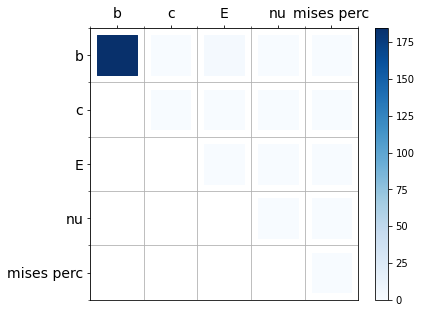

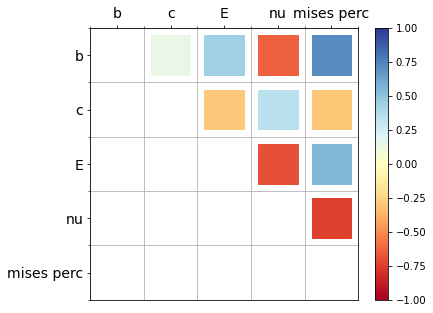

In [7]:
data_mat = d_20['groups_outputs']

cov_aleatoric = np.zeros((n_outputs, n_outputs))
mean_aleatoric = np.zeros((n_outputs, ))
for i, group in enumerate(data_mat):
    cov_aleatoric += 1/len(data_mat) * np.cov(np.array(group), rowvar=False)
    mean_aleatoric += 1/len(data_mat) * np.mean(np.array(group), axis=0)
d_20.update({'cov_aleatoric': cov_aleatoric})
#with open('data_aleatoric_n[20].pkl', 'wb') as f:
#    pickle.dump(d_20, f)

print(np.sqrt(np.diag(cov_aleatoric)) / mean_aleatoric)

labels=['b', 'c', 'E', 'nu', 'mises perc']
plot_covariance_matrix(cov_aleatoric, type_cov='covariance', ax=None, labels=labels, fontsize=14, cmap=None,)
plot_covariance_matrix(cov_to_corr(cov_aleatoric), type_cov='correlation', 
                       ax=None, labels=labels, fontsize=14, cmap=None,)

print(np.diag(cov_aleatoric))
print(cov_to_corr(cov_aleatoric))

Coeff. of Variation
[0.0273467  0.014752   0.00383356 0.00125885 0.29603296]

Variance
[1.86555007e+02 2.40353550e-05 2.40271307e-01 1.32019154e-07
 5.22730110e-03]

Correlation matrix
[[ 1.          0.1446698   0.43274    -0.63203412  0.71059508]
 [ 0.1446698   1.         -0.28216941  0.34356979 -0.30410508]
 [ 0.43274    -0.28216941  1.         -0.68566082  0.54584557]
 [-0.63203412  0.34356979 -0.68566082  1.         -0.75021977]
 [ 0.71059508 -0.30410508  0.54584557 -0.75021977  1.        ]]


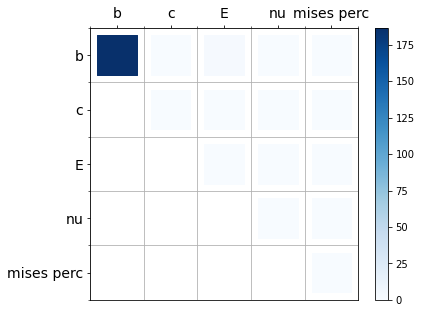

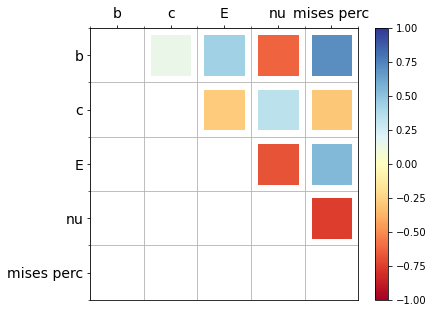

In [8]:
# Use bootstrapping 
data_mat = d_20['groups_outputs']

all_cov_aleatoric = np.zeros((len(data_mat), n_outputs, n_outputs))
all_mean_aleatoric = np.zeros((len(data_mat), n_outputs, ))
for i, group in enumerate(data_mat):
    m, C = do_bootstrapping(data=np.array(group), n_bootstrap=100, stat2='cov')
    all_cov_aleatoric[i] = C
    all_mean_aleatoric[i] = m

mean_aleatoric = do_bootstrapping(data=all_mean_aleatoric, n_bootstrap=100, stat2=None)
cov_aleatoric = do_bootstrapping(data=all_cov_aleatoric, n_bootstrap=100, stat2=None)

print('Coeff. of Variation')
print(np.sqrt(np.diag(cov_aleatoric)) / mean_aleatoric)
print()

labels=['b', 'c', 'E', 'nu', 'mises perc']
plot_covariance_matrix(cov_aleatoric, type_cov='covariance', ax=None, labels=labels, fontsize=14, cmap=None,)
plot_covariance_matrix(cov_to_corr(cov_aleatoric), type_cov='correlation', 
                       ax=None, labels=labels, fontsize=14, cmap=None,)

print('Variance')
print(np.diag(cov_aleatoric))
print()
print('Correlation matrix')
print(cov_to_corr(cov_aleatoric))

-0.7745966692414835


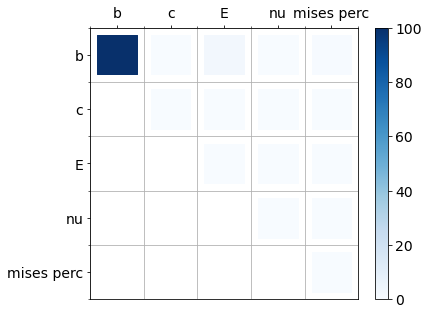

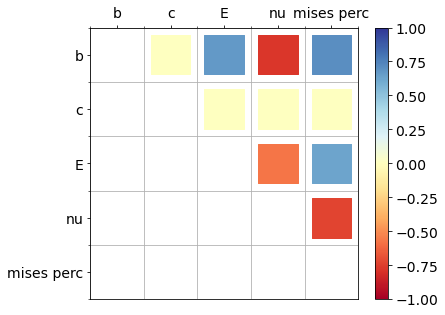

In [28]:
cov_aleatoric = np.array([[10e+01,  0.,  3e+00, -3e-03,  5e-01],
                          [0.,  2e-04, 0., 0.,  0.],
                          [3e+00, 0.,  2e-01, -10e-05,  2e-02],
                          [-3e-03, 0., -10e-05, 1.5e-07, -2e-05],
                          [5e-01,  0.,  2e-02, -2e-05,  5e-03]])
labels = ['b', 'c', 'E', 'nu', 'mises perc']
plot_covariance_matrix(cov_aleatoric, type_cov='covariance', ax=None, labels=labels, fontsize=14, cmap=None,)
plot_covariance_matrix(cov_to_corr(cov_aleatoric), type_cov='correlation', 
                       ax=None, labels=labels, fontsize=14, cmap=None,)
print(cov_to_corr(cov_aleatoric)[0,3])

# Do some plots for the paper

## Plot E vs vf, and microstructures for a few data

$b_{eff}$ (MPa)
2.0252826910876
$c_{eff}$
1.7076841087884531
$E_{eff}$ (GPa)
0.36533971110229213
$\nu_{eff}$
0.1288443252154724
$p_{\sigma}$
14.84363948226767


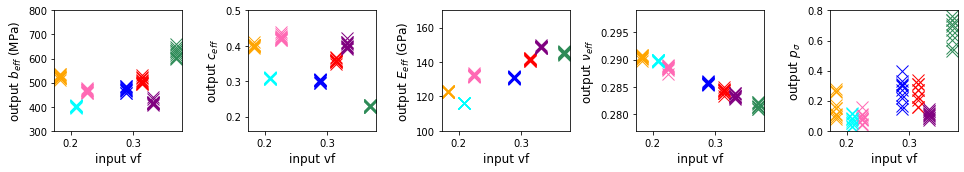

In [10]:
colors = ['red', 'black', 'blue', 'purple', 'seagreen', 'gray', 'hotpink', 'orange', 'cyan', 'darkgreen', ]

# Show evolution of one output as a function of the volume fraction
bounds_outputs = np.array([(300., 800.), (0.16, 0.5), (100., 170.), (0.277, 0.299), (0., 0.8)])
mean_outputs = np.mean(bounds_outputs, axis=-1)
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(13.5, 2.5))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
for j in range(5):
    vars_ = []
    for c, color in enumerate(colors):
        x = np.array(d_10['groups_inputs'][c])[:, 0]
        if x.size < 10:
            continue
        y = np.array(d_10['groups_outputs'][c])[:, j]
        vars_.append(np.var(y, ddof=1))
        ax[j].plot(x, y, linestyle='none', marker='x', color=color, markersize=12)
        ax[j].set_xlabel('input vf', fontsize=12)
        ax[j].set_ylabel('output '+output_names[j], fontsize=12)
        ax[j].set_ylim(bounds_outputs[j])
    print(output_names[j])
    print(np.sqrt(np.mean(vars_))/mean_outputs[j]*100)
fig.tight_layout()
#fig.savefig('materials_aleatory.png', bbox_inches='tight')
plt.show(fig)

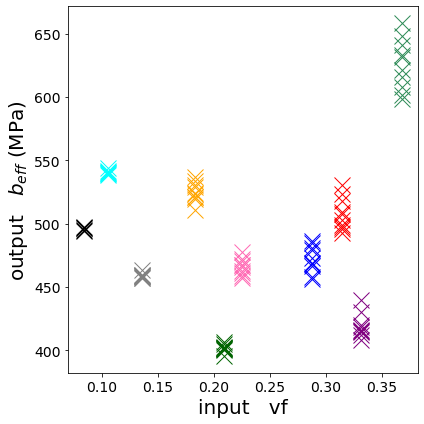

gray


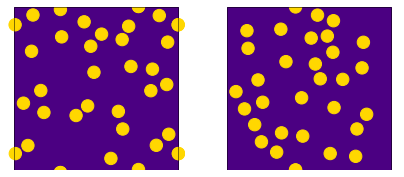

red


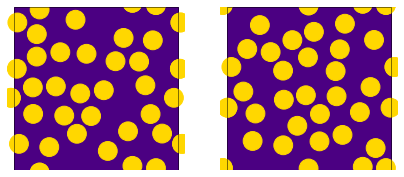

In [25]:
colors = ['red', 'black', 'blue', 'purple', 'seagreen', 'gray', 'hotpink', 'orange', 'darkgreen', 'cyan']

# Show evolution of one output as a function of the volume fraction
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
j = 0
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
for c, color in enumerate(colors):
    x = np.array(d_10['groups_inputs'][c])[:, 0]
    y = np.array(d_10['groups_outputs'][c])[:, j]
    ax.plot(x, y, linestyle='none', marker='x', color=color, markersize=16)
    ax.set_xlabel('input   vf', fontsize=20)
    ax.set_ylabel('output   '+output_names[j], fontsize=20)
fig.tight_layout()
plt.show(fig)

extension_file = '_v3_inputs[4]_ndata[10]_nsame[10]_lhs'
path_IO = 'IOfolder_few_runs/IOfolder'+extension_file+'/'
# Look at microstructures for colors grey and red
print(colors[5])
fig, ax = plt.subplots(ncols=2, figsize=(7, 3))
l = [50, 51]
for i, job_nb in enumerate(l):
    inputDict = read_input_data(job_nb, path_IO, extension_file)
    # plot structure
    ax[i] = plot_section_v2(inputDict['fibers_radius'], np.array(inputDict['fibers_center']), ax[i],
                           colors=['indigo', 'gold'], alphas=[1, 1])
    ax[i].axis('off')
#ax[i].grid(True)
#plt.tight_layout()
plt.show()

print(colors[0])
fig, ax = plt.subplots(ncols=2, figsize=(7, 3))
l = [0, 1]
for i, job_nb in enumerate(l):
    inputDict = read_input_data(job_nb, path_IO, extension_file)
    # plot structure
    ax[i] = plot_section_v2(inputDict['fibers_radius'], np.array(inputDict['fibers_center']), ax[i],
                           colors=['indigo', 'gold'], alphas=[1, 1])
    ax[i].axis('off')
#ax[i].grid(True)
plt.show()

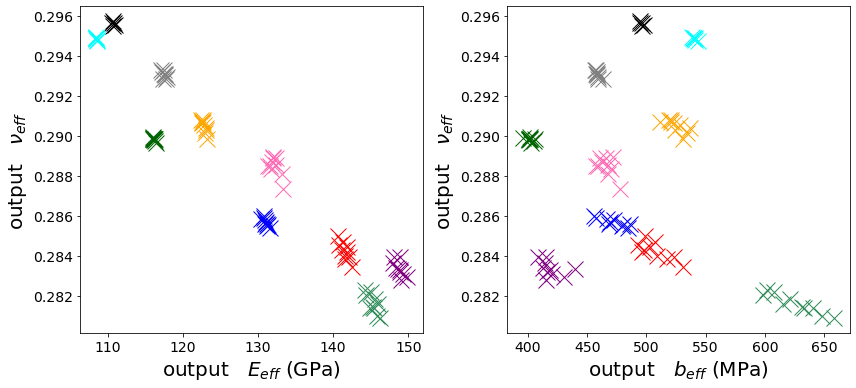

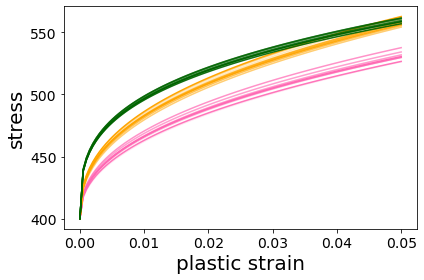

In [27]:
# Show evolution of two outputs as a function of each other
colors = ['red', 'black', 'blue', 'purple', 'seagreen', 'gray', 'hotpink', 'orange', 'darkgreen', 'cyan']

outpt_pairs = [[2, 3], [0, 3]]#, [3, 4]]
fig, ax = plt.subplots(ncols=len(outpt_pairs), nrows=1, figsize=(12, 5.5))
fig2, ax2 = plt.subplots(figsize=(6, 4.))
for c, color in enumerate(colors):
    if c in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        outpts = np.array(d_10['groups_outputs'][c])
        for j, pair in enumerate(outpt_pairs):
            ax[j].plot(outpts[:, pair[0]], outpts[:, pair[1]], linestyle='none', marker='x', 
                       color=color, markersize=16)
            ax[j].set_xlabel('output   '+output_names[pair[0]], fontsize=20)
            ax[j].set_ylabel('output   '+output_names[pair[1]], fontsize=20)
            #ax[j].axis('square')
            
        if c in [6, 7, 8]:
            domain = np.linspace(0, 0.05, 100)
            for n, out in enumerate(outpts):
                ax2.plot(domain, a_fixed+out[0]*domain**out[1], color=color, alpha=1-n/11)
            ax2.set_xlabel('plastic strain', fontsize=20)
            ax2.set_ylabel('stress', fontsize=20)
#ax[0].set_xlim([110, 140]); ax[0].set_ylim([350, 500])
#ax[1].set_xlim([300, 390]); ax[1].set_ylim([0.18, 0.28])
fig.tight_layout()
fig2.tight_layout()
plt.show(fig)
plt.show(fig2)

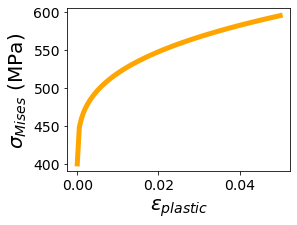

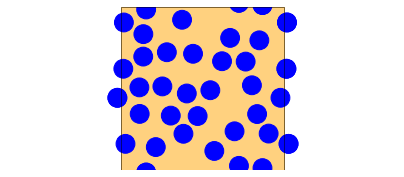

n el = 29280
n el in matrix = 18702
(29582, 1, 2)


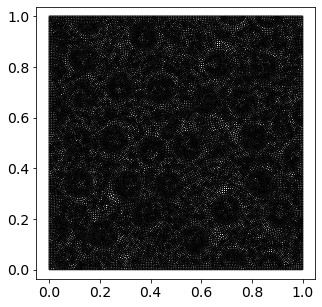

dict_keys(['el_PEEQ', 'el_Mises', 'el_S', 'el_PE', 'el_LE', 'el_Vol', 'el_EE'])
(51.256068, 1584.734056)


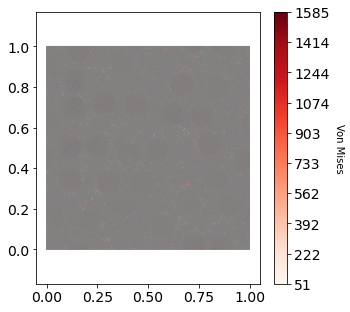

(51.256068, 1584.734056)


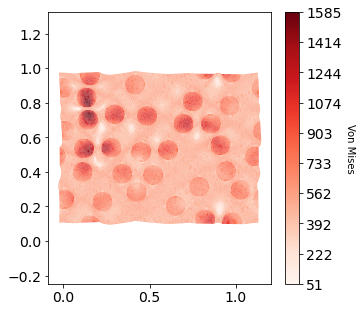

(-0.001, 0.7884146699905396)


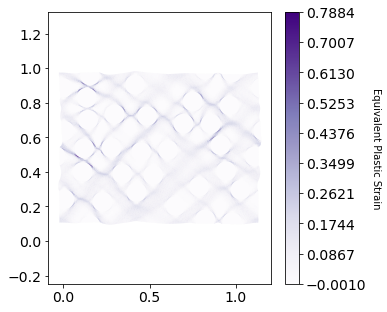

In [48]:
job_nbs = [0, ]
out = np.array(d_10['groups_outputs'][2])[0]
strain = np.linspace(0, 0.05, 200)

extension_file = '_v3_inputs[4]_ndata[10]_nsame[10]_lhs'
path_IO = 'IOfolder_few_runs/IOfolder'+extension_file+'/'

fig2, ax2 = plt.subplots(figsize=(4, 3))
ax2.plot(domain, a_fixed+out[0]*domain**out[1], linewidth=5, color='orange')
ax2.set_xlabel('$\epsilon_{plastic}$', fontsize=20)
ax2.set_ylabel('$\sigma_{Mises}$ (MPa)', fontsize=20)
plt.show(fig2)

fig, ax = plt.subplots(ncols=1, figsize=(7, 3))
for i, job_nb in enumerate(job_nbs):
    inputDict = read_input_data(job_nb, path_IO, extension_file)
    # plot structure
    ax = plot_section_v2(inputDict['fibers_radius'], np.array(inputDict['fibers_center']), ax)
    ax.axis('off')
#ax[i].grid(True)
plt.show()

dict_mesh = read_output_data(job_nbs[0], path_IO, ext='_outputs_mesh')
coord = dict_mesh['node_coord']
connectivity = dict_mesh['el_connectivity'].astype(int)
print('n el = {}'.format(dict_mesh['n_el']))
print('n el in matrix = {}'.format(len(dict_mesh['el_in_matrix'])))

print(dict_mesh['node_U'].shape)

fig, ax = plt.subplots(figsize=(5, 5), nrows=1)
plot_mesh(ax=ax, coord=coord, connectivity=connectivity)
plt.show()

dict_centroids = read_output_data(job_nb, path_IO, ext='_outputs_centroid')
print(dict_centroids.keys())
fig, ax = plt.subplots(figsize=(5, 5), nrows=1)
plot_field(dict_centroids['el_Mises'][:, -1], ax=ax, coord=coord, connectivity=connectivity,  
           cmap='Reds', cbarlabel='Von Mises', plot_mesh=True)
plt.show()

dict_centroids = read_output_data(job_nb, path_IO, ext='_outputs_centroid')
fig, ax = plt.subplots(figsize=(5, 5), nrows=1)
plot_field(dict_centroids['el_Mises'][:, -1], ax=ax, coord=coord + 3*dict_mesh['node_U'][:,-1,:], 
           connectivity=connectivity,  
           cmap='Reds', cbarlabel='Von Mises', plot_mesh=False)
plt.show()

dict_centroids = read_output_data(job_nb, path_IO, ext='_outputs_centroid')
fig, ax = plt.subplots(figsize=(5, 5), nrows=1)
plot_field(dict_centroids['el_PEEQ'][:, -1], ax=ax, coord=coord + 3*dict_mesh['node_U'][:,-1,:], 
           connectivity=connectivity,  
           cmap='Purples', cbarlabel='Equivalent Plastic Strain', plot_mesh=False)
plt.show()